In [1]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt


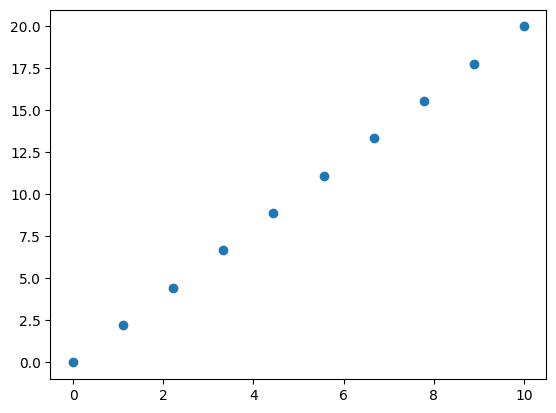

In [2]:
x= np.linspace(0,10,10)
y=x*2
plt.scatter(x,y)

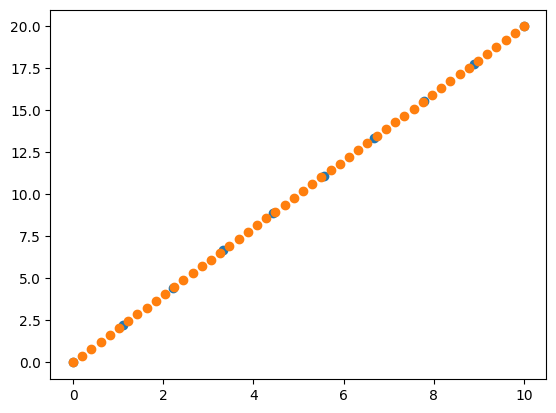

In [3]:
#=============== Interpolation ==================
f=interp1d(x,y,kind='linear')  #kind='cubic' ...
new_x= np.linspace(0,10,50)
new_y= f(new_x)
plt.scatter(x,y)
plt.scatter(new_x, new_y )
plt.show()

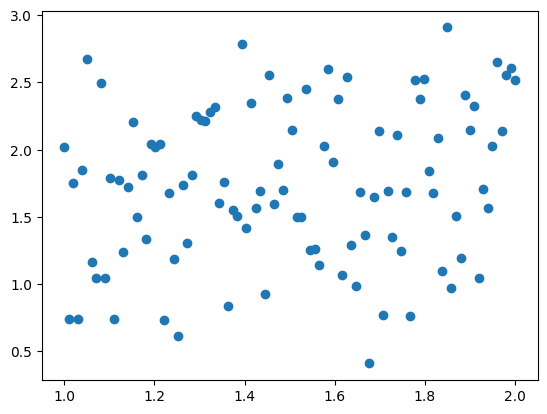

In [7]:

x= np.linspace(1,2, 100)
#print(x.shape) ===> (100, )
y= 1/3*x**3 - 3/5 * x**2 +2+ np.random.randn(x.shape[0])/2
plt.scatter(x,y)  # y depends on x

In [14]:
#================ find model f that passes throught the point cloud : optimize.curve_fit() =======================

#this is a general function , so it can be a cubic, quadratic or linear function depends on the shape of points cloud
def f(x, a,b,c,d,e) :
  return a**4*x + b**3*x + c**2*x+ d*x+e


In [9]:
from scipy import optimize

In [15]:
# we can do the same operation using Scikit learn open source library
params , params_covariance= optimize.curve_fit(f, x, y)


[ 1.17767414  1.4502469   0.6750236  -5.04449824  1.15723407]


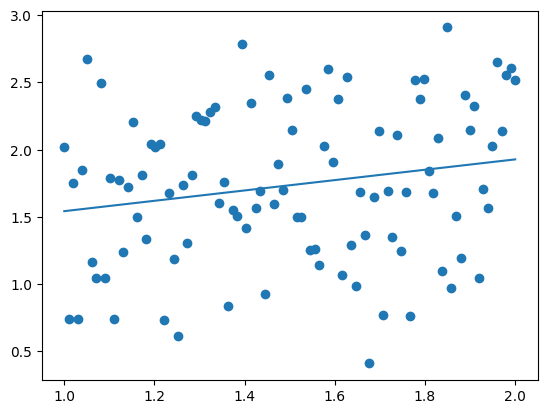

In [16]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3], params[4]))
print(params)
plt.show()

In [17]:
import numpy as np

def f(x) :
  return x**2 + 15*np.sin(x)

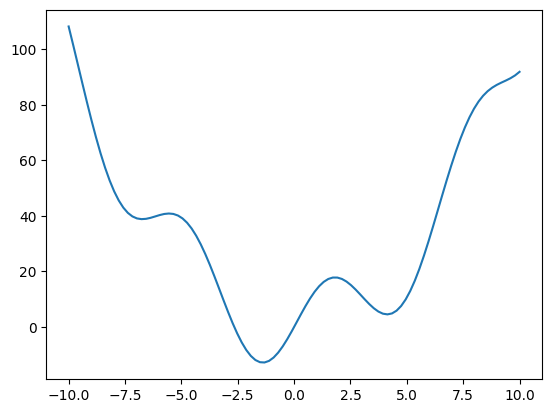

In [18]:
x= np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [19]:
#================== find le minimun local (1er minimun rencontre apres le point de depart) de la courbe ===============
optimize.minimize(f, x0=-3)  # find le 1er min local existant apres le point P(x0,)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -12.823616887803887
        x: [-1.385e+00]
      nit: 5
      jac: [ 5.484e-06]
 hess_inv: [[ 5.977e-02]]
     nfev: 12
     njev: 6

In [21]:
# f doit avoir un seul param
result= optimize.minimize(f, x0=-3).x
print(result)

[-1.38505571]


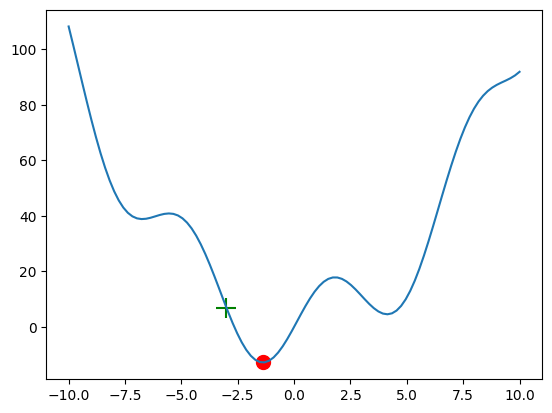

In [22]:
#=========== display this min in the plot ===============
x0=-3
plt.plot(x, f(x))
plt.scatter(result, f(result), s=100, c='r' , zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g' , zorder=1) # scatter 2D need x0 un elt
plt.show()

In [39]:
def f(x) :
  return np.sin(x[0])+np.cos(x[0]+x[1])*np.cos(x[0])


[-0.78539916 -2.35619345]


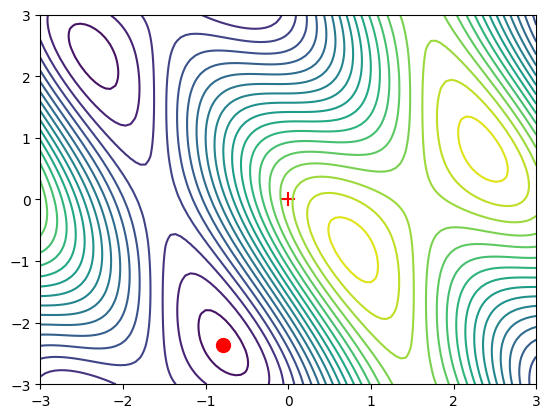

In [49]:
x= np.linspace(-3, 3, 100)
y= np.linspace(-3, 3, 100)
X, Y= np.meshgrid(x, y)
plt.contour(X,Y, f(np.array([X,Y])), 20 )
x0= [0,0]
plt.scatter(x0[0],x0[1], marker='+', c='r' , s=100)

result= optimize.minimize(f, x0=x0).x
print(result)
plt.scatter(result[0], result[1], s=100, c='r' , zorder=1)
plt.show()

In [50]:

from scipy import signal

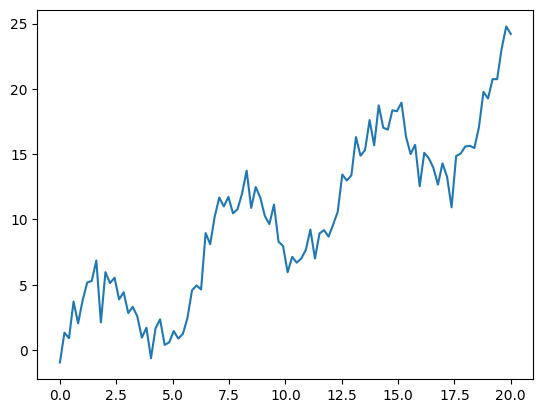

In [51]:
x= np.linspace(0,20,100)
y= x+4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x,y)

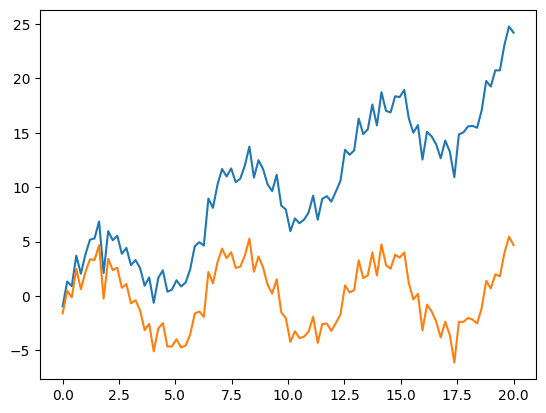

In [52]:
# =============== eliminer a tendance lineaire (fonction lineaire) form le signal======
new_y= signal.detrend(y)
plt.plot(x,y)
plt.plot(x, new_y)
plt.show()

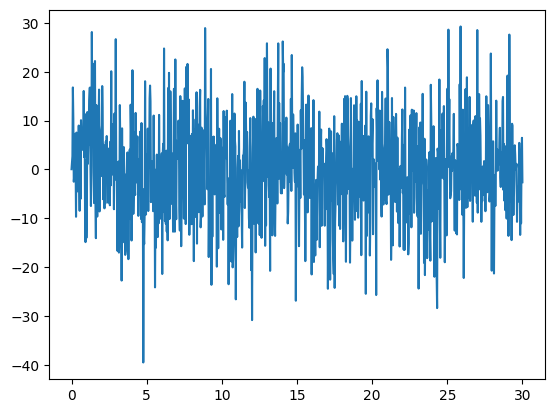

In [54]:
 x= np.linspace(0,30,1000)
 y= 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)+np.random.randn(x.shape[0])*10
 plt.plot(x,y)

In [55]:
from scipy import fftpack

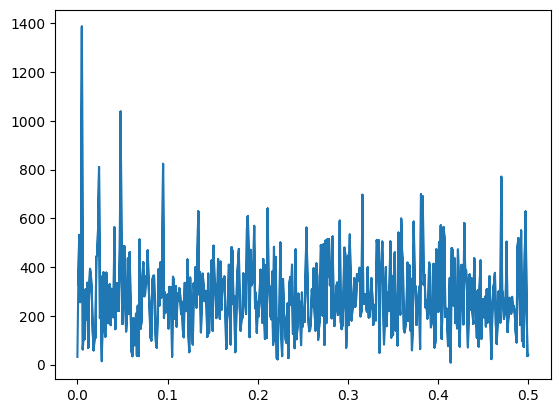

In [76]:
amplitude_pos_neg= fftpack.fft(y)
amplitude_pos= np.abs(amplitude_pos_neg)

frequences_pos_neg= fftpack.fftfreq(y.size)
frequences_pos= np.abs(frequences_pos_neg)
plt.plot(frequences_pos, amplitude_pos)

plt.show()

[   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.       

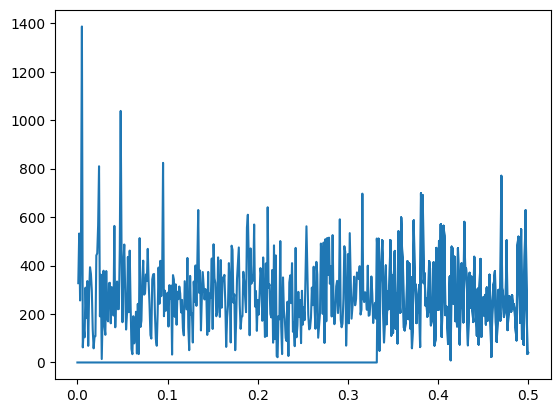

In [77]:
amplitude_pos[x<10]=0
print(amplitude_pos)
plt.plot(frequences_pos, amplitude_pos)

plt.show()

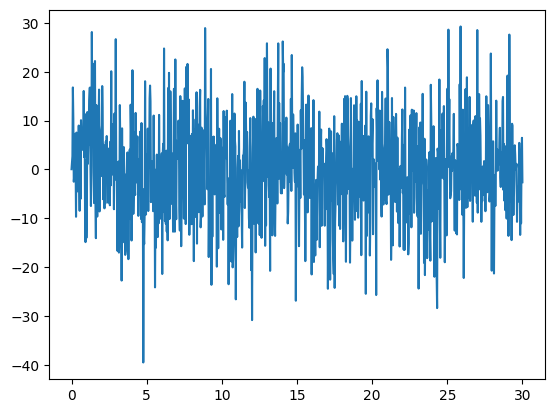

In [78]:
#================== transformation de fourier inverse ==========

y_inverse= fftpack.ifft(amplitude_pos_neg)
plt.plot(x, y_inverse )
plt.show()

In [3]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
(32, 32)


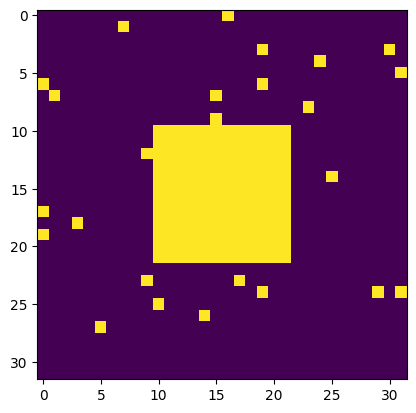

In [7]:
np.random.seed(0)
X= np.zeros((32,32))
X[10:-10, 10:-10] =1
print(X[10:-10, 10:-10])
print(X.shape)
X[np.random.randint(0,32,30), np.random.randint(0,32,30)]=1
plt.imshow(X)

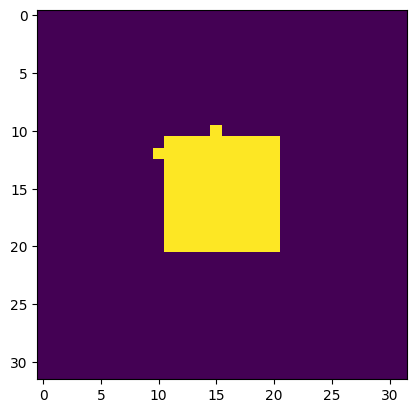

In [17]:
#================= Morphology =================
open_x= ndimage.binary_opening(X)  #=== erosion
plt.imshow(open_x)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


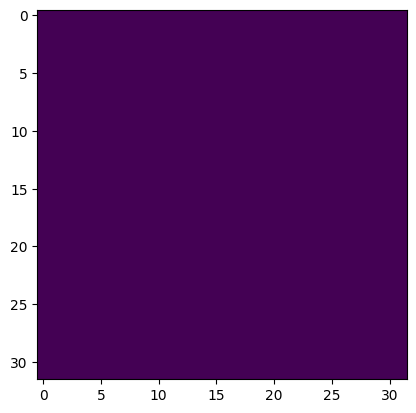

In [13]:
Y= np.ones((32,32))
Y[1,1]=1
print(Y)
plt.imshow(Y)